In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plotif(arri,da,db,drae = False):
    d = [[],[],[]]
    for j in range(len(arri)):
        d[0].append(arri[j][0])
        d[1].append(arri[j][1])
        d[2].append(arri[j][2])

    e = [np.unique(d[0]),np.unique(d[1]),np.rot90(np.reshape(d[2],(np.shape(np.unique(d[0]))[0],np.shape(np.unique(d[1]))[0])))]
    extent = (np.min(e[0]),np.max(e[0]),np.min(e[1]),np.max(e[1]))
    f = np.log(e[2])
    dd =[da,db]
    if drae ==False:
        plt.xlabel(da)
        plt.ylabel(db)
        plt.imshow(f,aspect='auto',cmap=plt.cm.Spectral,extent= extent)
        plt.colorbar()
        plt.show()
    else:
        #plt.figure(figsize=(6, 15), dpi=80)
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
        '''deltachi_1 = np.max(e[2]) - 2*np.log(np.mean(e[2],axis=0))
        deltachi_2 = np.max(e[2]) - 2*np.log(np.mean(e[2],axis=1))
        '''
        #plt.plot(e[1],np.log(np.mean(e[2],axis=1)),xlabel=db,ylabel='chi_sq')
    
        deltachi_1=np.log(np.mean(e[2],axis=0))/np.min(np.log(np.mean(e[2],axis=0)))
        deltachi_2=np.log(np.mean(e[2],axis=1))/np.min(np.log(np.mean(e[2],axis=1)))
        ax1.plot(e[0],deltachi_1)
        ax1.set_xlabel(dd[0])
        ax2.set_xlabel(dd[1])
        ax1.set_ylabel('chi_sq')
        ax2.set_ylabel('chi_sq')
        

        ax2.plot(e[1],deltachi_2)
        plt.show()
        print('Resulted Values')
        for i in range(2):

            s = np.mean(e[2],axis=i)/np.min(np.mean(e[2],axis=i))
            eff = 1.01
            es = []
            ess = []
            for l in range(len(e[i])):
                if s[l] > eff:
                    es.append(0)
                elif s[l] <= eff:
                    es.append(e[i][l])
                    ess.append(e[i][l])
            er = [np.min(ess),np.average(ess),np.max(ess)]
            error = np.std(er)

            
            print(dd[i],':',d[i][np.argmin(np.mean(e[2],axis=i))],'+_',error)
            
    return e


In [224]:
def plot_parameter_array(parameter_array,rangess): #plot all the 2d parameters in an array
    loaded_array=[]
    aray = []
    index_aray = [[1,0], 
        [2,0],  [2,1],
        [3,0],[3,1],[3,2],
        [4,0], [4,1], [4,2], [4,3],
        [5,0], [5,1], [5,2], [5,3],[5,4]]
    for i in parameter_array:
        try :
            loaded_array.append(np.load('plot_arr/'+i[0]+'_'+i[1]+'.npy'))
            aray.append(i)
        except:
            print(i[0]+'_'+i[1], 'doesnt exist')
    fig,axs = plt.subplots(6,6,figsize=(25,20),dpi=60)

    y_ar = np.rot90(np.rot90(index_aray))
    s_Ar = [[0,0],[1,1],[2,2],[3,3],[4,4],[5,5]]
    for t in y_ar:
        s_Ar.append(t)
    for j in s_Ar:
        axs[j[0],j[1]].set_visible(False)
    for i in range(len(aray)):
        d = [[],[],[]]
        for j in range(len(loaded_array[i])):
            d[0].append(loaded_array[i][j][0])
            d[1].append(loaded_array[i][j][1])
            d[2].append(loaded_array[i][j][2])
        e2 = np.rot90(np.reshape(d[2],(np.shape(np.unique(d[0]))[0],np.shape(np.unique(d[1]))[0])))
        e1 = np.rot90(np.reshape(d[1],(np.shape(np.unique(d[0]))[0],np.shape(np.unique(d[1]))[0])))
        e0 = np.rot90(np.reshape(d[0],(np.shape(np.unique(d[0]))[0],np.shape(np.unique(d[1]))[0])))
        e = [np.unique(d[0]),np.unique(d[1]),e2]
        
        #f = np.transpose(np.log(e[2])
        #Content is changed due to input content like  extent(0->1) and label x <-> y and f for 
        extent = (np.min(e[1]),np.max(e[1]),np.min(e[0]),np.max(e[0]))
        f = np.rot90(np.transpose(np.rot90(np.log(e[2]),3)))#only calculations to view in imshow
        r = np.log(f/np.min(f))
        min_e1 = d[1][np.argmin(d[2])] #chi_min
        min_e0 = d[0][np.argmin(d[2])] #chi_min
        '''condi = r>rangess
        fs = np.where(condi,np.nan,r)
        print(np.min(np.nanmean(fs,axis = 1)), np.min(np.nanmean(fs,axis = 0)))'''
        par_1 = e[0][np.argmin(np.nanmean(r,axis = 1))]
        par_2 = e[1][np.argmin(np.nanmean(r,axis = 0))]
        axs[index_aray[i][0],index_aray[i][1]].axhline(par_1,color='red')
        axs[index_aray[i][0],index_aray[i][1]].axvline(par_2,color='red')
        axs[index_aray[i][0],index_aray[i][1]].axhline(min_e0,color='navy')
        axs[index_aray[i][0],index_aray[i][1]].axvline(min_e1,color='navy')
        axs[index_aray[i][0],index_aray[i][1]].set_ylabel(aray[i][0])
        axs[index_aray[i][0],index_aray[i][1]].set_xlabel(aray[i][1])
        
        axs[index_aray[i][0],index_aray[i][1]].imshow(r,aspect='auto',cmap=plt.cm.Spectral,extent= extent)
    
    plt.tight_layout()
    plt.savefig('parameter_array')
    plt.show()

Red cross is Mean Calculatiion and blue cross minimum chi


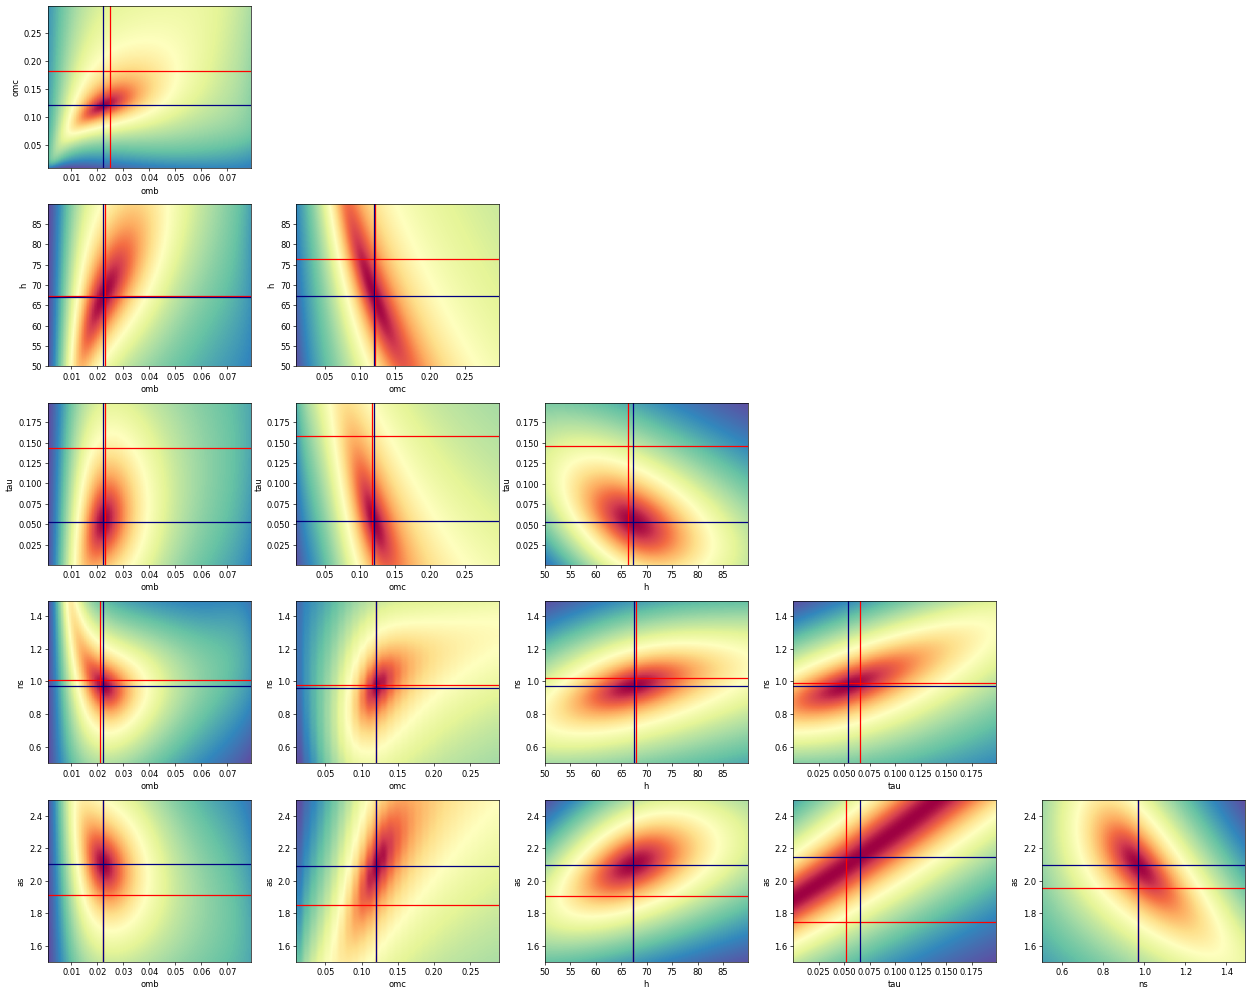

In [225]:
pars_aray = [['omc','omb'],
        ['h','omb'],  ['h','omc'],
        ['tau','omb'],['tau','omc'],['tau','h'],
        ['ns','omb'], ['ns','omc'], ['ns','h'], ['ns','tau'],
        ['as','omb'], ['as','omc'], ['as','h'], ['as','tau'],['as','ns']]
print('Red cross is Mean Calculatiion and blue cross minimum chi')
plot_parameter_array(pars_aray,0.4)    

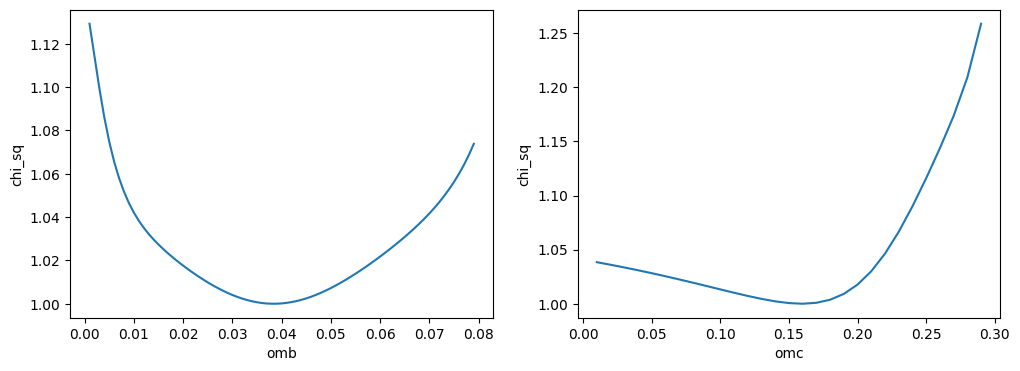

Resulted Values
omb : 0.002 +_ 0.002857738033247041
omc : 0.16 +_ 0.008164965809277256


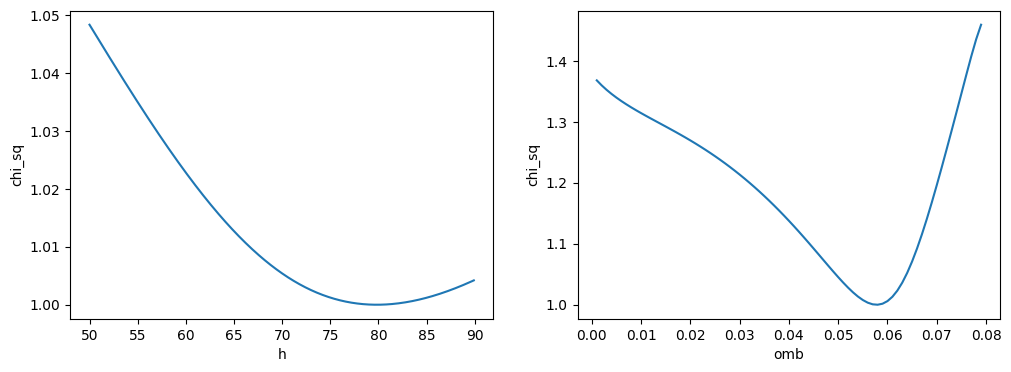

Resulted Values
h : 50.300000000000004 +_ 3.755884272267593
omb : 0.058 +_ 0.0004082482904638634


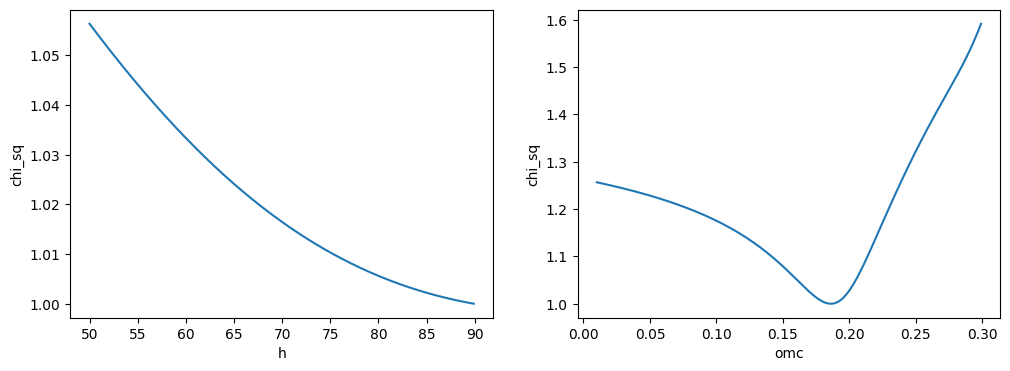

Resulted Values
h : 50.1 +_ 1.020620726159675
omc : 0.18599999999999986 +_ 0.00244948974278318


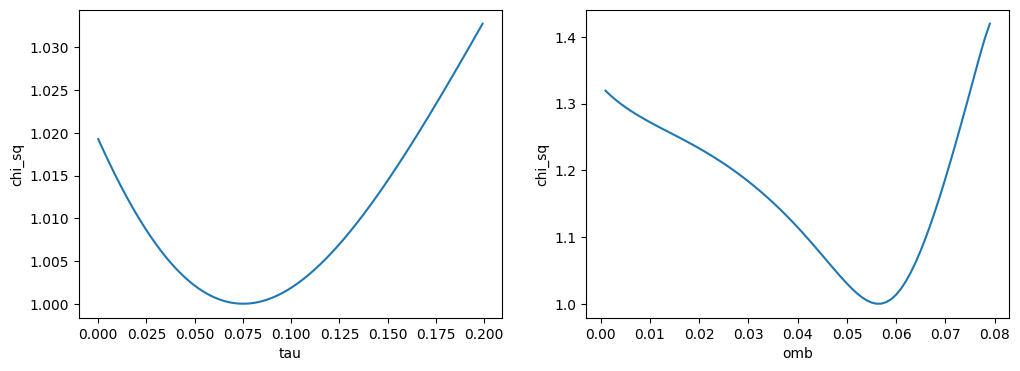

Resulted Values
tau : 0.0001 +_ 0.014288690166235204
omb : 0.056 +_ 0.0004082482904638634


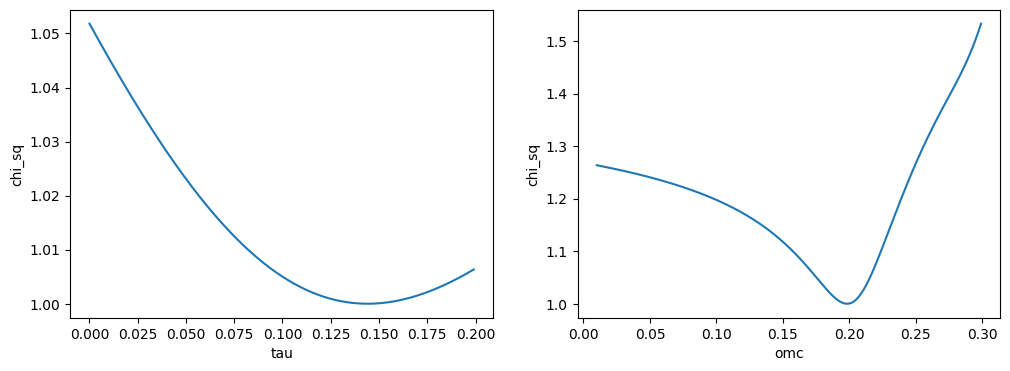

Resulted Values
tau : 0.0001 +_ 0.01632993161855452
omc : 0.19799999999999984 +_ 0.002041241452319317


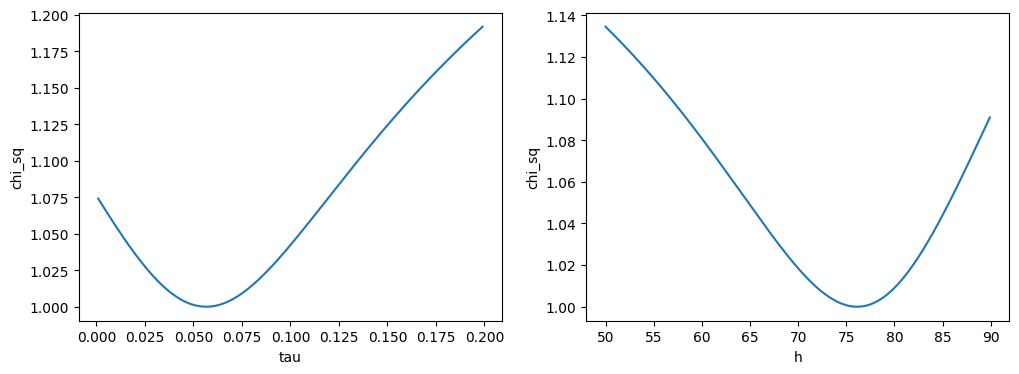

Resulted Values
tau : 0.001 +_ 0.005307227776030218
h : 76.10000000000036 +_ 1.1430952132988326


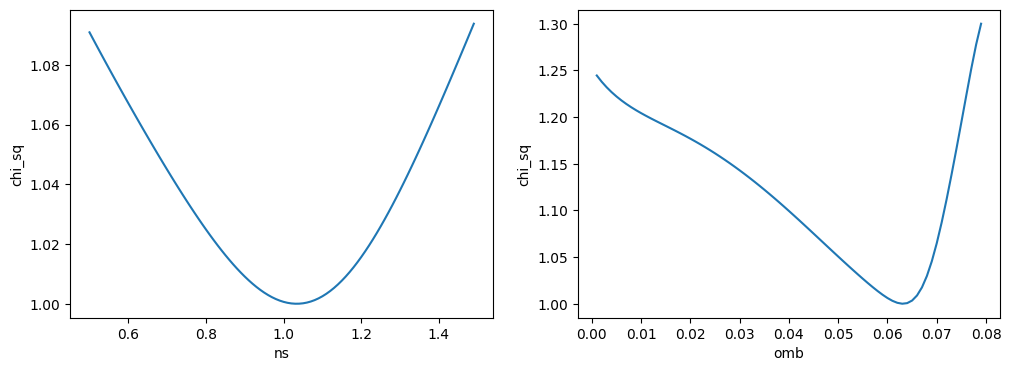

Resulted Values
ns : 0.5 +_ 0.028577380332470436
omb : 0.063 +_ 0.0008164965809277268


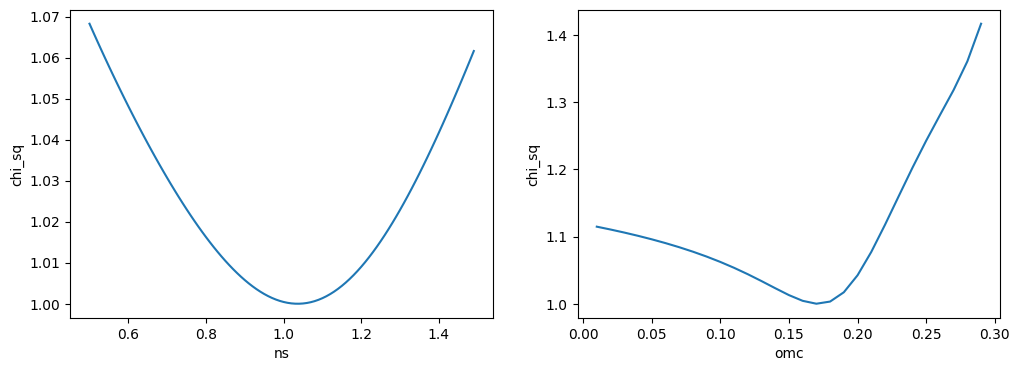

Resulted Values
ns : 0.51 +_ 0.04082482904638634
omc : 0.17 +_ 0.0


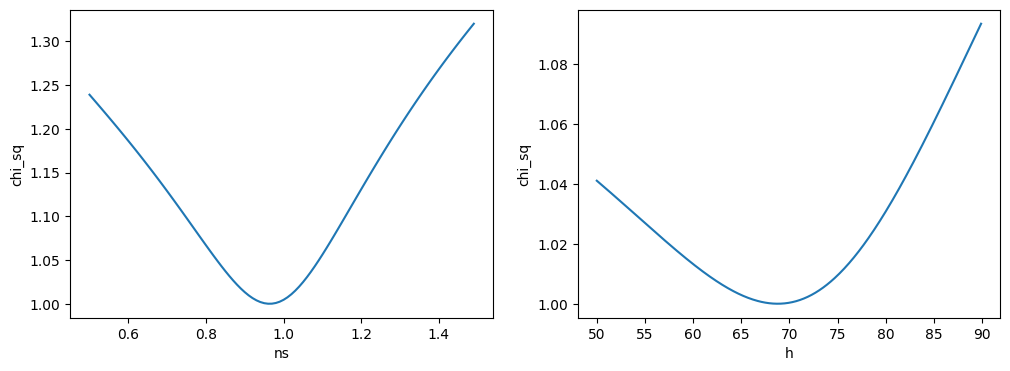

Resulted Values
ns : 0.5 +_ 0.012247448713915901
h : 68.80000000000027 +_ 1.7962924780410228


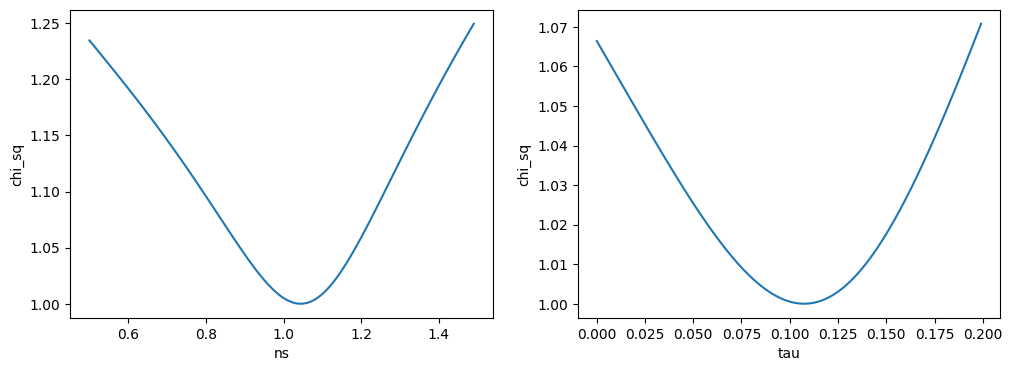

Resulted Values
ns : 0.5 +_ 0.012247448713915901
tau : 0.1071 +_ 0.008573214099741126


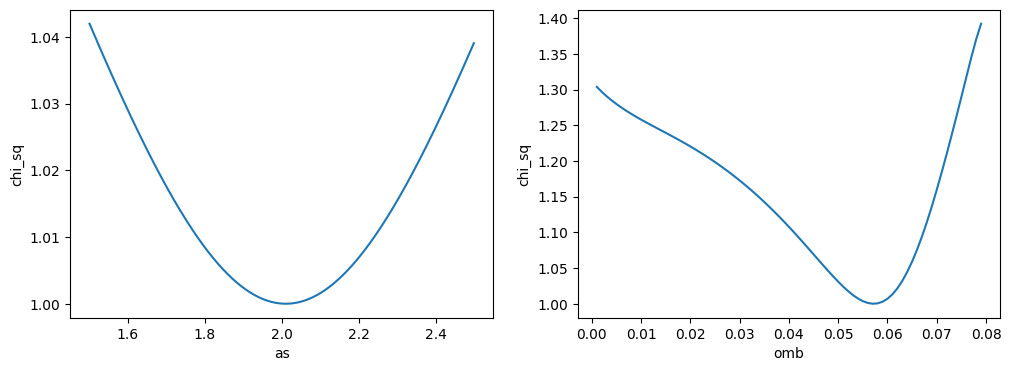

Resulted Values
as : 1.5059999999999993 +_ 0.05837950553632598
omb : 0.057 +_ 0.0008164965809277268


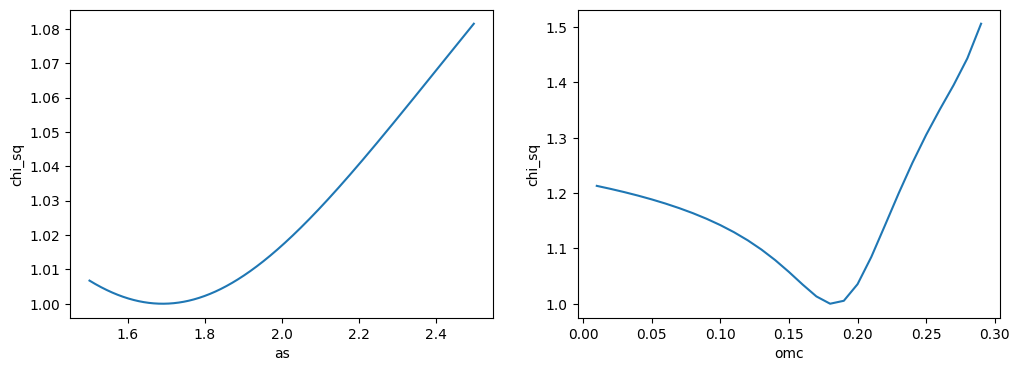

Resulted Values
as : 1.5059999999999993 +_ 0.0587877538267898
omc : 0.18000000000000002 +_ 0.0


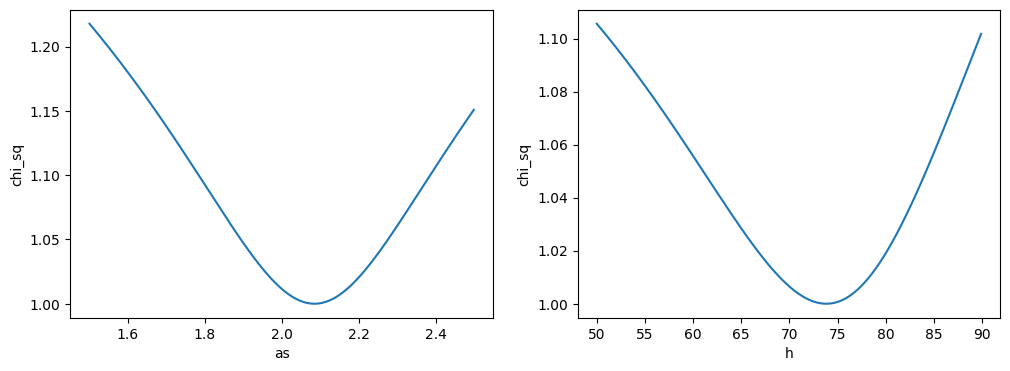

Resulted Values
as : 1.501 +_ 0.02245365597550999
h : 73.80000000000034 +_ 1.2247448713916007


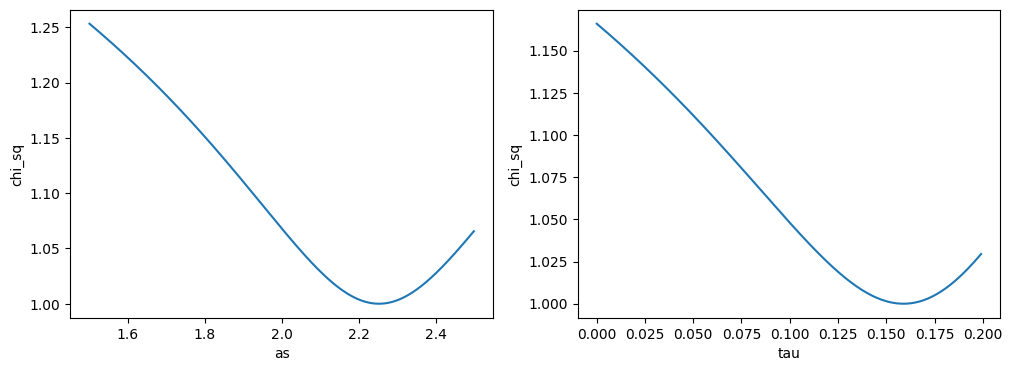

Resulted Values
as : 1.5029999999999997 +_ 0.024086649137365263
tau : 0.1591 +_ 0.006123724356957951


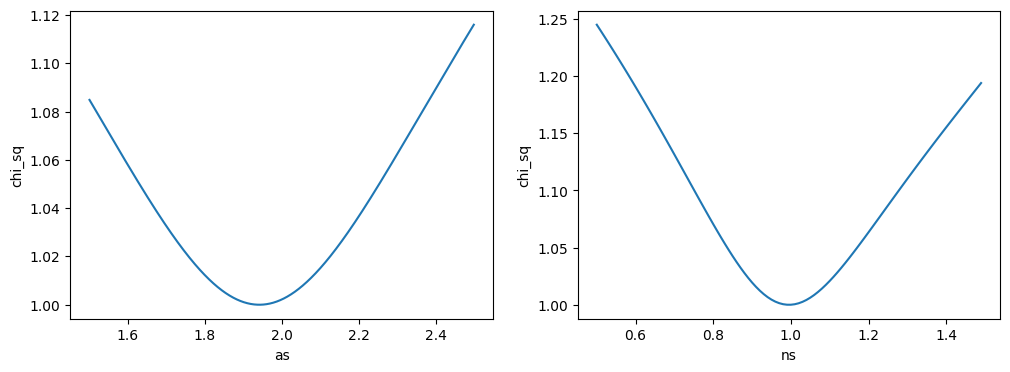

Resulted Values
as : 1.5039999999999996 +_ 0.033884608108496896
ns : 1.0000000000000004 +_ 0.012247448713915901


In [187]:
for i in pars_aray:
    try :
        file = np.load('plot_arr/'+i[0]+'_'+i[1]+'.npy')
        plotif(file,i[0],i[1],True)

    except:
        print(i[0]+'_'+i[1], 'doesnt exist') 